In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


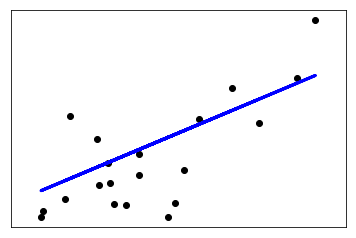

In [2]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
type(diabetes_X_train)

numpy.ndarray

In [9]:
diabetes_y_test.shape

(20,)

In [8]:
diabetes_y_train.shape

(422,)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing.data import minmax_scale

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import stockAI

def univariateFITest():
    # #############################################################################
    # Compute feature importance
    f_test, _ = f_regression(X_test, y_test)
    f_test /= np.max(f_test)
    print("F-test Feature Importance Matrix:\n {}".format(f_test))
    mi = mutual_info_regression(X_test, y_test)
    mi /= np.max(mi)
    print(" Mutual Info Regression Feature Importance Matrix:\n {}".format(mi))
    # Plot feature importance
    plt.figure(4)
    feature_importance = mi
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot()
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, feature_names_[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()



(5886, 18)
(5886, 3)


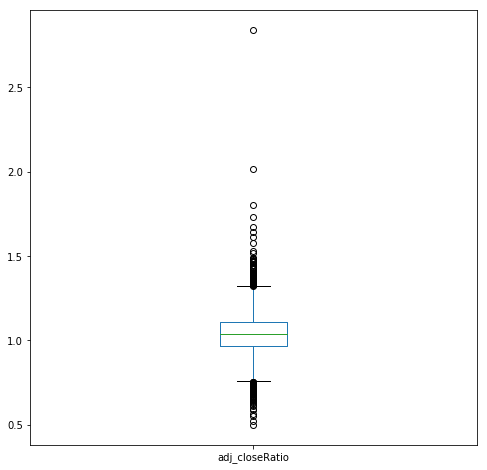

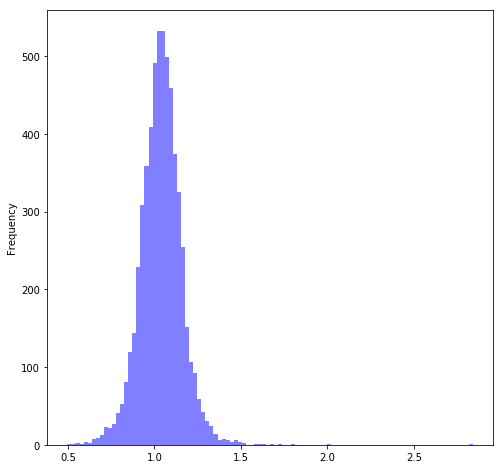

In [2]:
# #############################################################################
# Data overview
target = pd.read_csv('target.csv', index_col='date') #, features =  stockAI.preprocess()
features = pd.read_csv('features.csv', index_col='date')
print(features.shape)
print(target.shape)
plt.figure(1, figsize=(8,8))
target['adj_closeRatio'].plot(kind='box')

plt.figure(2, figsize=(8,8))
target['adj_closeRatio'].plot(kind='hist', color='b', alpha=0.5, bins=100)


In [33]:
target.head()
#features.head()

,adj_closeRatio,adj_openRatio,symbol
date,,,
2013-09-30 00:00:00.000000,1.098112,1.092831,MMM
2013-09-30 00:00:00.000000,1.091889,1.056355,ABBV
2013-09-30 00:00:00.000000,1.023346,1.031476,ACN
2013-09-30 00:00:00.000000,1.169705,1.197849,ATVI
2013-09-30 00:00:00.000000,1.220349,1.188830,AYI


In [28]:
target_=target['adj_closeRatio'].values#.reshape(-1, 1) #
#target_= np.array(target.iloc[:,1])
#features_=np.array(features.iloc[:,10:12])
features_=np.array(features[['BasicEPSNetIncome','GrossMarginPctTTM']].values)#.reshape(-1, 1)
feature_names_=features.columns[9:]
print(features_.shape, target_.shape)

(5886, 2) (5886,)


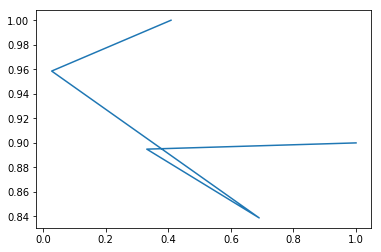

In [67]:
target_scaled = target['adj_closeRatio'][:5].values/max(target['adj_closeRatio'][:5].values)
features_scaled = features['BasicEPSNetIncome'][:5].values/max(features['BasicEPSNetIncome'][:5].values) #,'GrossMarginPctTTM']]
plt.plot(features_scaled, target_scaled)

MAE = 0.3525290220642253
MSE = 0.1811502246975172
pval= 0.17619633307488805


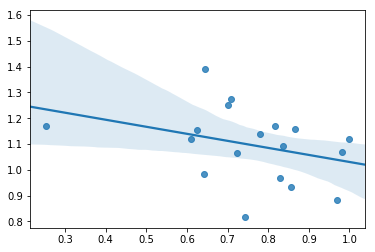

In [251]:
from sklearn.feature_selection import f_regression
df=target.adj_closeRatio.where(target.symbol=='ATVI').dropna()
df2=features.where(target.symbol=='ATVI').iloc[:,10:11].dropna()
#df = df/df.max()
df2 = df2/df2.max()
#df.plot()
#df2.plot()
x=df2.values
y=df.values
sns.regplot(x,y)
metrics.r2_score(x,y)
f_test, pval = f_regression(x, y)
print(f'MAE = {metrics.mean_absolute_error(x,y)}\nMSE = {metrics.mean_squared_error(x,y)}\npval= {pval[0]}')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Coefficients: 
 [array([[-0.93034588,  0.32409852,  0.04502979],
       [ 0.93446501,  0.30361043, -1.01681004],
       [ 0.62402557, -0.46570996,  0.68694505]]), array([[-0.00117957],
       [-0.13222935],
       [-0.06582365]])]
MAE = 0.03088802819003703
MSE = 0.001655274316902073
pval= 0.17619633307488805


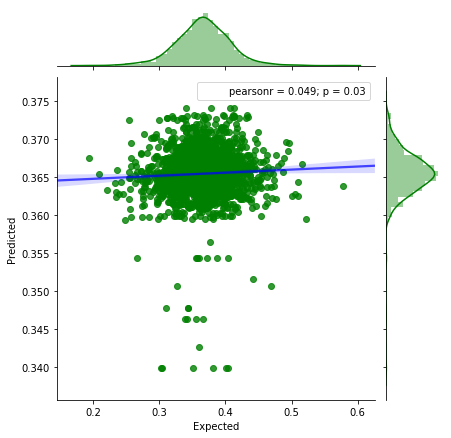

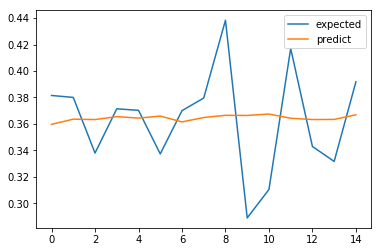

In [265]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
df=target.adj_closeRatio#.where(target.symbol=='ACN').dropna()
df2=features.iloc[:,10:13]#.where(target.symbol=='ACN').iloc[:,10:11].dropna()
df = df/df.max()
df2 = df2/df2.max()
#df.plot()
#df2.plot()
x=df2.values
y=df.values
#x = np.arange(0.0, 1, 0.01).reshape(-1, 1)
#y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)
n = nn.fit(X_train, y_train)
expected = np.array(y_test).reshape(-1,1)
predict = nn.predict(X_test).reshape(-1,1)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(x, y, s=5, c='b', marker="o", label='real')
#ax1.plot(X_test,y_test, c='r', label='NN Prediction')

#plt.legend()
#plt.show()
corr_plot = sns.jointplot(expected, predict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')

results=pd.DataFrame(expected, columns=['expected'])
results['predict']=predict
results[:15].plot()

print('Coefficients: \n', nn.coefs_)
print(f'MAE = {metrics.mean_absolute_error(expected, predict)}\nMSE = {metrics.mean_squared_error(expected, predict)}\npval= {pval[0]}')

In [271]:
target_ = target.reset_index()
features_ = features.reset_index()
data = target_.merge(features_, on=['date', 'symbol'])
data.head()
data.

,date,adj_closeRatio,adj_openRatio,symbol,fiscalqtr,MarketCapBasic,TotalRevenue,CommonStock,NetIncome,TotalCurrentAssets,...,TotalStockholdersEquity,EBIT,DebttoEquity,GrossMarginPctTTM,OperatingMarginPctTTM,BasicEPSNetIncome,PriceEarningsTTM,PriceEarningsFY,PriceBookFQ,ROA
0,2013-09-30 00:00:00.000000,1.098112,1.092831,MMM,Q3,1.301056e+11,7.916000e+09,9000000.0,1.230000e+09,1.328200e+10,...,1.779600e+10,1.739000e+09,0.32462,0.4946,0.2285,1.81,27.4590,28.9508,11.5381,0.069117
1,2013-09-30 00:00:00.000000,1.091889,1.056355,ABBV,Q3,1.477896e+11,4.658000e+09,16000000.0,9.640000e+08,1.654300e+10,...,3.577000e+09,1.371000e+09,4.14006,0.7505,0.3399,0.60,28.0606,29.2175,29.1226,0.269500
2,2013-09-30 00:00:00.000000,1.023346,1.031476,ACN,Q3,9.416723e+10,7.707935e+09,75000.0,8.102580e+08,1.207892e+10,...,5.324867e+09,1.141971e+09,0.00000,0.2990,0.1260,1.25,26.7856,23.5180,10.3276,0.152165
3,2013-09-30 00:00:00.000000,1.169705,1.197849,ATVI,Q3,4.999020e+10,6.910000e+08,0.0,5.600000e+07,8.251000e+09,...,1.213900e+10,7.000000e+07,0.18214,0.6436,0.1865,0.05,184.1667,175.8889,5.3673,0.004613
4,2013-09-30 00:00:00.000000,1.220349,1.188830,AYI,Q3,5.296302e+09,5.415000e+08,500000.0,3.170000e+07,8.374000e+08,...,9.226000e+08,5.000000e+07,0.38316,0.4174,0.1393,0.74,15.8329,23.6984,3.2456,0.034359


In [319]:
#test_data['date'] = pd.DataFrame(data.date)
#test_data['X_test'] = pd.DataFrame(X_train.reshape(-1,1))
features_names = features.iloc[:,10:13].columns
test_data= pd.DataFrame(y_test.reshape(-1,1), columns=['y_test'])
train_data= pd.DataFrame(y_train.reshape(-1,1), columns=['y_train'])

X_test.reshape(-3,3)
X_train.reshape(-3,3)

for indx, name in enumerate(features_names):
    test_data[name] = X_test[:,indx]
    train_data[name] = X_train[:,indx]

train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')
print(train_data.head())
print(test_data.head())

    y_train  DebttoEquity  GrossMarginPctTTM  OperatingMarginPctTTM
0  0.296962      0.001639             0.0531               0.046702
1  0.381200      0.001078             0.8521               0.245337
2  0.380713      0.001641             1.0000               0.803487
3  0.349922      0.001359             0.3070               0.176194
4  0.403807      0.000955             0.6387               0.291433
     y_test  DebttoEquity  GrossMarginPctTTM  OperatingMarginPctTTM
0  0.381511      0.001101             0.7083              -0.085519
1  0.380042      0.000432             0.2492               0.149052
2  0.337960      0.000290             0.2931               0.027900
3  0.371422      0.000590             0.4225               0.180591
4  0.370271      0.001307             0.3956               0.084155


### Run Number 2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Coefficients: 
 [array([[ 0.02854182,  0.66626933,  0.1919382 ],
       [ 0.22621564,  0.9614464 , -0.51082162],
       [-0.50449638,  0.35918253,  0.3476342 ]]), array([[0.34916218],
       [0.12030784],
       [0.35300674]])]
MAE = 0.03105747238264413
MSE = 0.0016681040874332784
pval= 0.17619633307488805


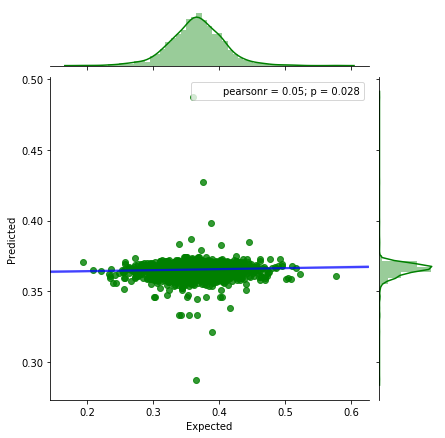

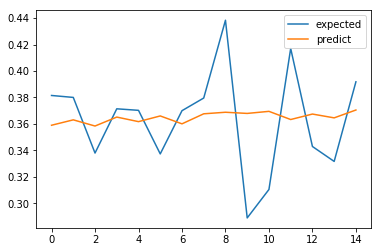

In [320]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
df=target.adj_closeRatio#.where(target.symbol=='ACN').dropna()
df2=features.iloc[:,10:13]#.where(target.symbol=='ACN').iloc[:,10:11].dropna()
df = df/df.max()
df2 = df2/df2.max()
#df.plot()
#df2.plot()
x=df2.values
y=df.values
#x = np.arange(0.0, 1, 0.01).reshape(-1, 1)
#y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)
n = nn.fit(X_train, y_train)
expected = np.array(y_test).reshape(-1,1)
predict = nn.predict(X_test).reshape(-1,1)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(x, y, s=5, c='b', marker="o", label='real')
#ax1.plot(X_test,y_test, c='r', label='NN Prediction')

#plt.legend()
#plt.show()
corr_plot = sns.jointplot(expected, predict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')

results=pd.DataFrame(expected, columns=['expected'])
results['predict']=predict
results[:15].plot()

print('Coefficients: \n', nn.coefs_)
print(f'MAE = {metrics.mean_absolute_error(expected, predict)}\nMSE = {metrics.mean_squared_error(expected, predict)}\npval= {pval[0]}')

In [321]:
#test_data['date'] = pd.DataFrame(data.date)
#test_data['X_test'] = pd.DataFrame(X_train.reshape(-1,1))
features_names = features.iloc[:,10:13].columns
test_data= pd.DataFrame(y_test.reshape(-1,1), columns=['y_test'])
train_data= pd.DataFrame(y_train.reshape(-1,1), columns=['y_train'])

X_test.reshape(-3,3)
X_train.reshape(-3,3)

for indx, name in enumerate(features_names):
    test_data[name] = X_test[:,indx]
    train_data[name] = X_train[:,indx]

train_data.to_csv('train_data2.csv')
test_data.to_csv('test_data2.csv')
print(train_data.head())
print(test_data.head())

    y_train  DebttoEquity  GrossMarginPctTTM  OperatingMarginPctTTM
0  0.296962      0.001639             0.0531               0.046702
1  0.381200      0.001078             0.8521               0.245337
2  0.380713      0.001641             1.0000               0.803487
3  0.349922      0.001359             0.3070               0.176194
4  0.403807      0.000955             0.6387               0.291433
     y_test  DebttoEquity  GrossMarginPctTTM  OperatingMarginPctTTM
0  0.381511      0.001101             0.7083              -0.085519
1  0.380042      0.000432             0.2492               0.149052
2  0.337960      0.000290             0.2931               0.027900
3  0.371422      0.000590             0.4225               0.180591
4  0.370271      0.001307             0.3956               0.084155


### Run 3

In [330]:
predict3 =  nn.predict(np.array([0.001101, 0.7083,-0.085519]).reshape(1,3))
predict4 = nn.predict(np.array([ 0.001641, 1.1000, 0.803487]).reshape(1,3))
print(f'Ratio Change: {predict3}\nRatio Change: {predict4}')

Ratio Change: [0.35899075]
Ratio Change: [0.3547669]


In [405]:
y_train3 = target.iloc[:5879,1].values.reshape(-1,1)
X_train3 = features.iloc[:5879,10:13].values.reshape(-3,3)
y_test3 = target.iloc[5880:,1]
X_test3 = features.iloc[5880:,10:13]
features_.where(features_['fiscalqtr'] == 'Q1').count()
X_test3 = features_.set_index('date').filter(like='2018', axis=0).iloc[:,10:13].reset_index().iloc[:,1:].values.reshape(-3,3)
y_test3 = target_.set_index('date').filter(like='2018', axis=0).iloc[:,0].reset_index().iloc[:,1:].values.reshape(-1,1)
y_train3.shape
y_test3.shape

(7, 1)

In [469]:
y_train3.shape
X_test3.shape

(7, 3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(7, 3)
(7, 1)
Variance score: -0.1582464607476528
Coefficients: 
 [array([[ 0.50000011,  0.50576842, -0.32278682,  0.55259524, -0.43471658],
       [-0.54263028, -0.39080959, -0.78379791,  0.25774149, -0.83032401],
       [ 0.46882665,  0.57870917,  0.27710232, -0.10810137, -0.22466713]]), array([[-0.43016481],
       [ 0.64036361],
       [-0.02849418],
       [-0.22440406],
       [ 0.02077026]])]
Intercepts: 
 [array([ 0.61704125,  0.65503211, -0.29807241,  0.69746949, -0.81979075]), array([1.04308283])]
MAE = 0.10781655259868743
MSE = 0.017769473211737073


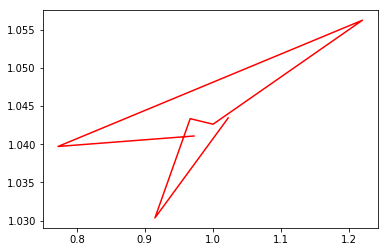

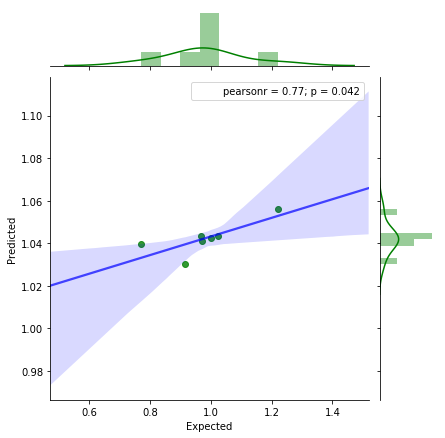

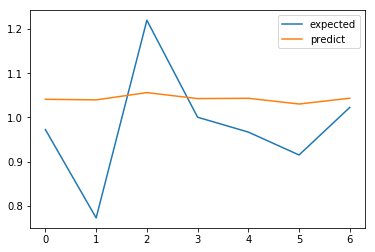

In [575]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

y_train3 = y_train3.ravel()
nn = MLPRegressor(hidden_layer_sizes=(5,), 
                  activation='tanh', solver='lbfgs', max_iter=1000, warm_start=False)

n = nn.fit(X_train3, y_train3)
expected = y_test3
predict =  nn.predict(X_test3)

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(X_train3, y_train3, s=5, c='b', marker="o", label='real')
ax1.plot(expected, predict, c='r', label='NN Prediction')

#plt.legend()
#plt.show()

corr_plot = sns.jointplot(expected, predict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')

results=pd.DataFrame(expected, columns=['expected'])
results['predict']=predict
results[:15].plot()
print(X_test3.shape)
print(predict.reshape(-1,1).shape)
print('Variance score: {}'.format(metrics.r2_score(expected, predict)))
print('Coefficients: \n', nn.coefs_)
print('Intercepts: \n', nn.intercepts_)
print(f'MAE = {metrics.mean_absolute_error(expected, predict)}\nMSE = {metrics.mean_squared_error(expected, predict)}')

#### 

In [ ]:
## test_data['date'] = pd.DataFrame(data.date)
#test_data['X_test'] = pd.DataFrame(X_train.reshape(-1,1))
features_names = features.iloc[:,10:13].columns
test_data= pd.DataFrame(y_test.reshape(-1,1), columns=['y_test'])
train_data= pd.DataFrame(y_train.reshape(-1,1), columns=['y_train'])

X_test.reshape(-3,3)
X_train.reshape(-3,3)

for indx, name in enumerate(features_names):
    test_data[name] = X_test[:,indx]
    train_data[name] = X_train[:,indx]

train_data.to_csv('train_data2.csv')
test_data.to_csv('test_data2.csv')
print(train_data.head())
print(test_data.head())

### Other Algorithms

RMS: 0.047591619440498306

Coefficients: 
 [-0.16203538]
Mean squared error: 0.002264962240969216
Variance score: 0.3030663755441998


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


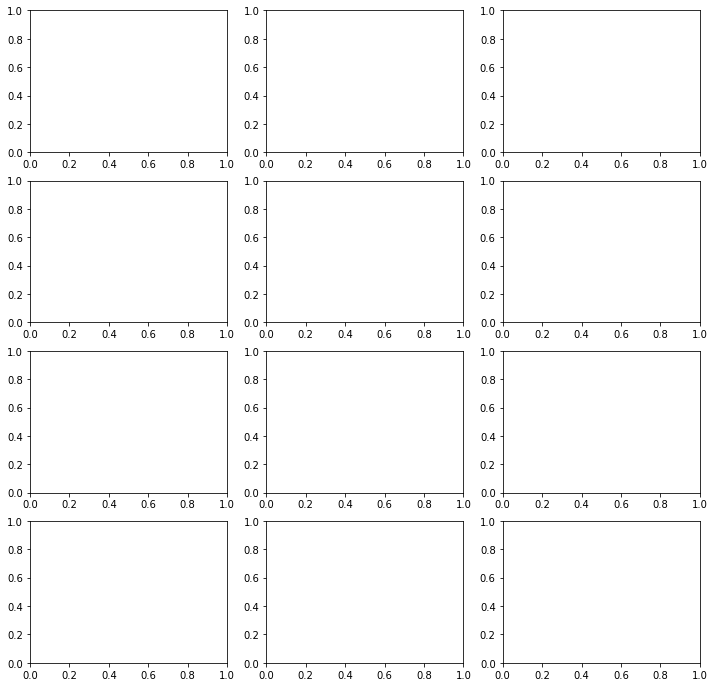

<Figure size 864x864 with 0 Axes>

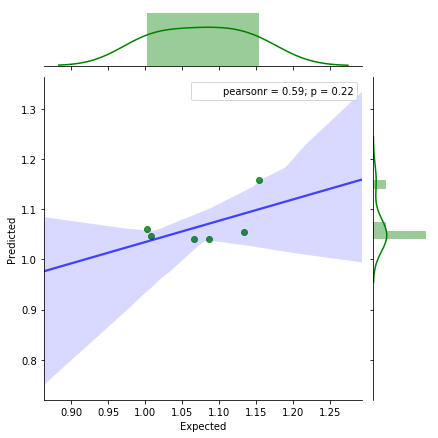

In [163]:
# #############################################################################
# Plot feature
fig, axs = plt.subplots(4, 3, figsize=(12,12), sharex=False, sharey=False)
#fig2, axs2 = plt.subplots(5, 3, figsize=(8, 8),sharex=False, sharey=False)
r=0
c=0
plt.figure(3, figsize=(12,12))
#plt.figure(3)
feature_names_=features.columns[9:]
for index, feature_name in enumerate(feature_names_):
    #color = np.random.choice(['r','b','y','g','c','m'])
    #axs[r,c].hist(features.iloc[:, index], color=color, alpha=0.5, density=True, bins=50)
    #axs[r,c].set_xlabel(feature_name)
    #axs[r,c].set_ylabel('Price')
    #axs2[r,c].scatter(data.data[:, index], data.target, color=color, alpha=0.5)
    #axs2[r,c].set_xlabel(feature_name)
    #axs2[r,c].set_ylabel('Price')
    c+=1
    if r > 3:
        r=0
    if c > 2:
        c=0
        r+=1
plt.subplots_adjust(hspace=0.46, wspace=0.29, top=0.94, right=0.95, bottom=0.07, left=0.07)
# #############################################################################
# Scale data
newData = [('Data after quantile transformation (uniform pdf)', \
        QuantileTransformer(output_distribution='uniform') \
        .fit_transform(features_))]
newTarget = minmax_scale(target_)
# #############################################################################
# Fit regression model
#X_train, X_test, y_train, y_test = train_test_split(features_, target_)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)
regr = LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
expected = y_test
# #############################################################################
# Regression model performance
print('RMS: {}\n'.format(np.sqrt(np.mean((predicted - expected) ** 2))))
corr_plot = sns.jointplot(expected, predicted, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: {}'.format(metrics.mean_squared_error(expected, predicted)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(metrics.r2_score(expected, predicted)))
plt.show()
#univariateFITest()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Variance score: -1.4423314331152586


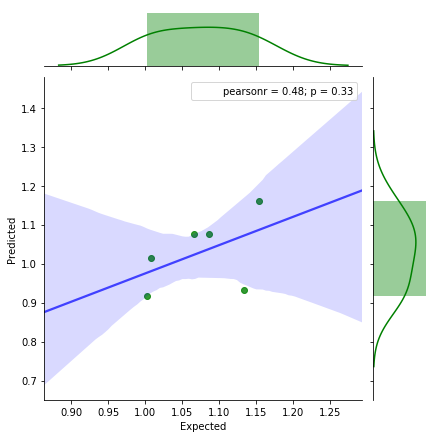

In [177]:
from sklearn.ensemble import RandomForestRegressor

rregr = RandomForestRegressor(n_estimators=3)
rregr.fit(X_train, y_train)
predict= rregr.predict(X_test)
FI = rregr.feature_importances_
corr_plot = sns.jointplot(expected, predict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')
rregr.decision_path(X_train)
expected.shape # 
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(metrics.r2_score(expected, predict)))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Variance score: -2.5261177708646207


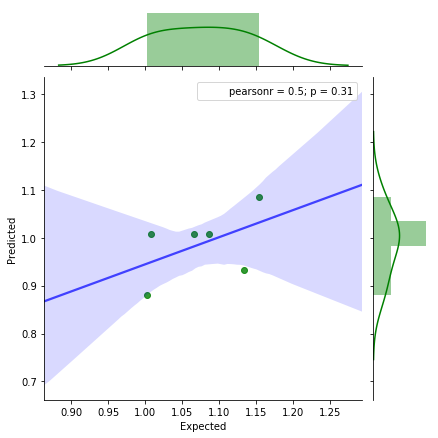

In [178]:
dregr = DecisionTreeRegressor(splitter='best', max_features='log2')
dregr.fit(X_train, y_train)
dpredict= dregr.predict(X_test)
FI = dregr.feature_importances_
corr_plot = sns.jointplot(expected, dpredict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(metrics.r2_score(expected, dpredict)))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Variance score: -0.04303453139124902


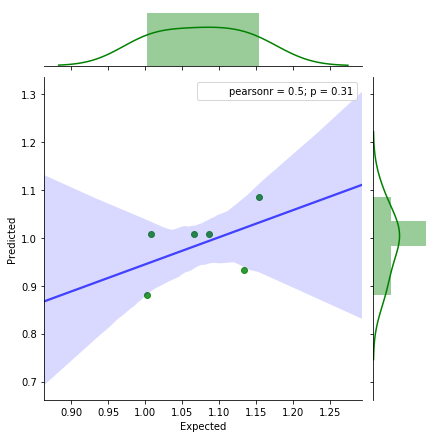

In [179]:
from sklearn import svm

clf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, y_train) 
spredict = clf.predict(X_test)
corr_plot = sns.jointplot(expected, dpredict, kind='reg', color='g', line_kws={"color": "b", "alpha": 0.7})
corr_plot.set_axis_labels('Expected', 'Predicted')
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(metrics.r2_score(expected, spredict)))